In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
np.random.seed(42)
X,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)

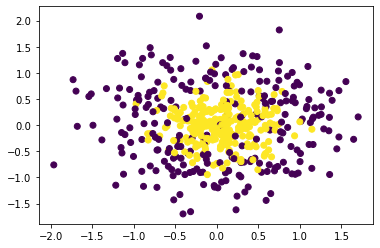

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc=AdaBoostClassifier() #no hyperparameter tuning

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

0.786

In [7]:
abc.fit(X,y)

AdaBoostClassifier()

In [12]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12,8))
    x_range=np.linspace(X.min(),X.max(),100)
    xx1,xx2=np.meshgrid(x_range,x_range)
    y_hat=clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
    y_hat=y_hat.reshape(xx1.shape)
    plt.contour(xx1,xx2,y_hat,alpha=0.2)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
    plt.title('adaboost classifier')
    plt.show()

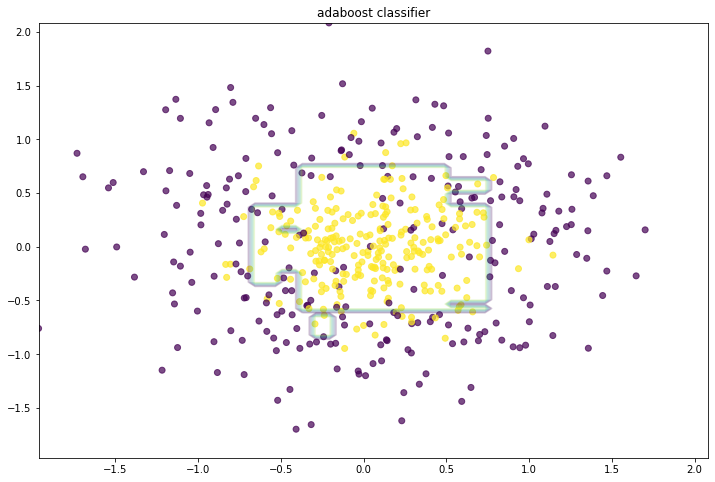

In [13]:
plot_decision_boundary(abc)

# Now let us understand the working of the hyperparameters

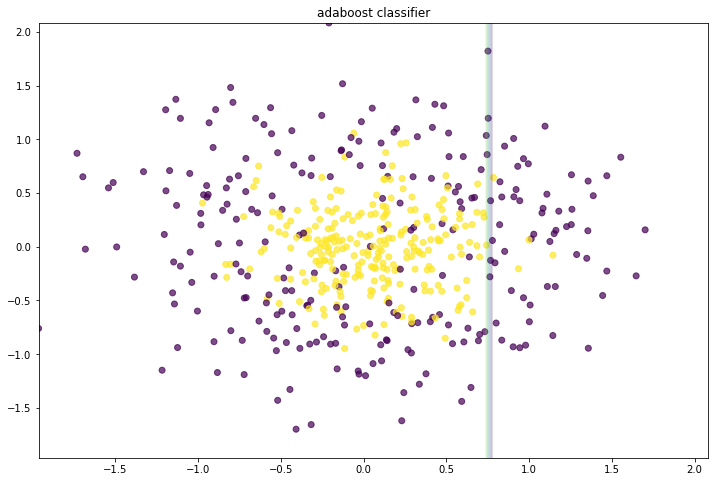

In [20]:
abc=AdaBoostClassifier(n_estimators=1)
abc.fit(X,y)
plot_decision_boundary(abc)

Underfititng is visible

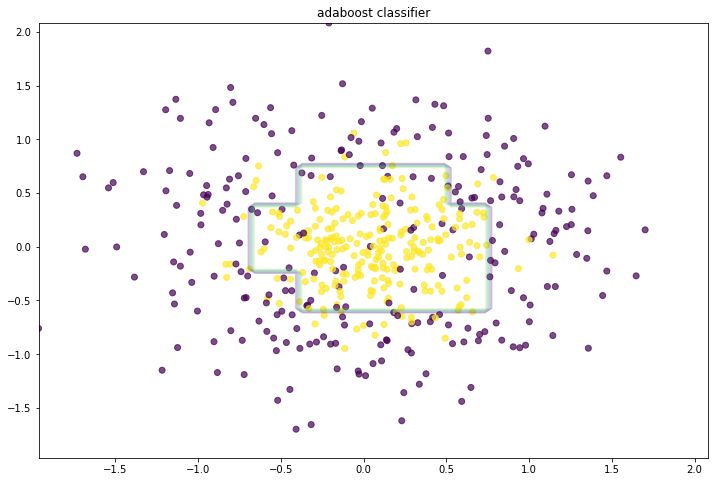

In [21]:
abc=AdaBoostClassifier(n_estimators=10)
abc.fit(X,y)
plot_decision_boundary(abc)

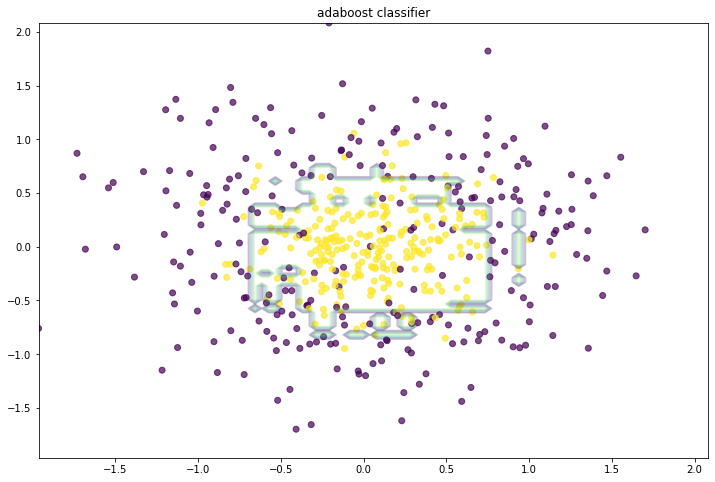

In [22]:
abc=AdaBoostClassifier(n_estimators=150)
abc.fit(X,y)
plot_decision_boundary(abc)

Overfitting is visible( small regions)

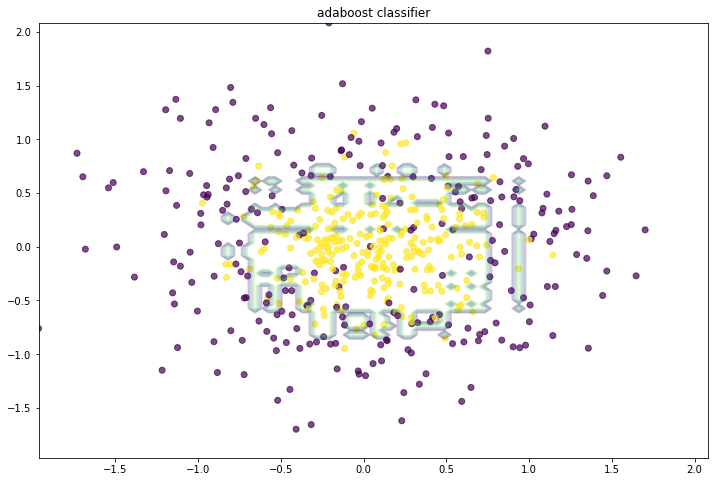

In [23]:
abc=AdaBoostClassifier(n_estimators=500)
abc.fit(X,y)
plot_decision_boundary(abc)

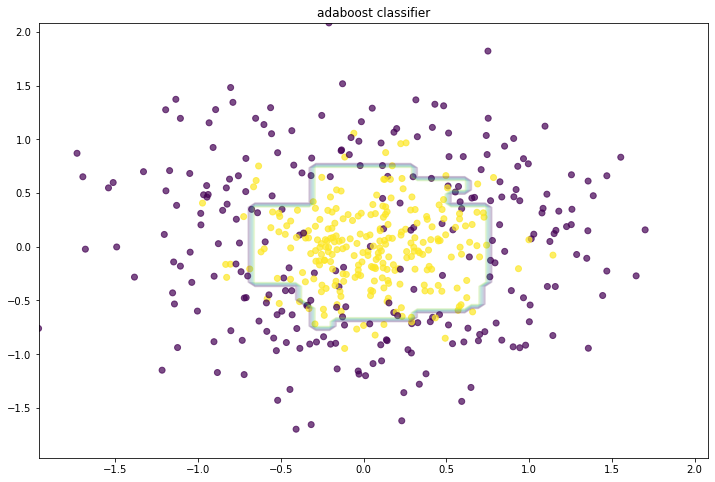

In [25]:
abc=AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

In [26]:
from sklearn.model_selection import GridSearchCV

grid={'n_estimators':[10,50,100,500],'learning_rate':[0.0001,0.001,0.01,0.1,1.0],
     'algorithm':['SAMME','SAMME.R']}

grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy')

grid_result=grid_search.fit(X,y)

print(grid_result.best_score_)
print(grid_result.best_params_)

0.8320000000000001
{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
